In [64]:
#################################################################
# MLND Capstone > Crypto Ethereum Future Price RNN Classifier 
# Input - Ethereum minute price data, exchange Gemini, year 2018
# Output - A Prediction better than random 0.5
#################################################################

### Check installed python and packages

In [1]:
# check python version
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

In [2]:
# check tensorflow, keras version and GPU
import tensorflow as tf

# Check TensorFlow Version
print (tf.VERSION)

# Check Keras Version
print(tf.keras.__version__)

# Check for a GPU
# print (tf.test.gpu_device_name())
# notice - this code line uses GPU VRam
# if executed and GPU VRam is low, then restart notebook kernel to free GPU VRam

1.10.0
2.1.6-tf


## Data Exploration

In [3]:
import pandas as pd
import numpy as np

preview_data_eth = './data/minute/gemini_ETHUSD_2018_1min.csv'

df_ETH = pd.read_csv(preview_data_eth, parse_dates=True, skiprows=2, names=['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume From', 'Volume To'])
df_ETH.set_index('Date', inplace=True)
df_ETH.sort_index(inplace=True)
df_ETH_close_price = df_ETH['Close']


<p>The list of columns in the dataset
</p>

In [4]:
df_ETH.columns

Index(['Unix Timestamp', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume From', 'Volume To'],
      dtype='object')

<p>Preview top 5 data points:</p>

In [5]:
print(df_ETH.head())

                     Unix Timestamp  Symbol    Open    High     Low   Close  \
Date                                                                          
2018-01-01 00:00:00      1514764800  ETHUSD  736.11  739.47  736.11  737.98   
2018-01-01 00:01:00      1514764860  ETHUSD  737.98  737.98  737.97  737.98   
2018-01-01 00:02:00      1514764920  ETHUSD  737.98  737.98  736.03  736.03   
2018-01-01 00:03:00      1514764980  ETHUSD  736.03  738.79  736.03  738.29   
2018-01-01 00:04:00      1514765040  ETHUSD  738.29  738.29  738.29  738.29   

                     Volume From  Volume To  
Date                                         
2018-01-01 00:00:00     0.587303        NaN  
2018-01-01 00:01:00     2.410785        NaN  
2018-01-01 00:02:00     1.613000        NaN  
2018-01-01 00:03:00     1.135121        NaN  
2018-01-01 00:04:00     0.000000        NaN  


<p>Preview last 5 data points:</p>

In [6]:
print(df_ETH.tail())

                     Unix Timestamp  Symbol   Open   High     Low  Close  \
Date                                                                       
2018-12-31 23:55:00   1546300500000  ETHUSD  130.8  130.8  130.80  130.8   
2018-12-31 23:56:00   1546300560000  ETHUSD  130.8  130.8  130.00  130.0   
2018-12-31 23:57:00   1546300620000  ETHUSD  130.0  130.0  128.53  130.0   
2018-12-31 23:58:00   1546300680000  ETHUSD  130.0  130.0  130.00  130.0   
2018-12-31 23:59:00   1546300740000  ETHUSD  130.0  130.8  130.00  130.8   

                     Volume From  Volume To  
Date                                         
2018-12-31 23:55:00     0.000000        NaN  
2018-12-31 23:56:00    79.267075        NaN  
2018-12-31 23:57:00    44.386537        NaN  
2018-12-31 23:58:00     7.966173        NaN  
2018-12-31 23:59:00     8.688215        NaN  


In [7]:
# Show the calculated statistics
minimum_price = np.min(df_ETH_close_price)
maximum_price = np.max(df_ETH_close_price)
mean_price = np.mean(df_ETH_close_price)
median_price = np.median(df_ETH_close_price)
std_price = np.std(df_ETH_close_price)

print ("Statistics for Ethereum Close Price on exchange Gemini in year 2018:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price: ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Ethereum Close Price on exchange Gemini in year 2018:

Minimum price: $80.83
Maximum price: $1,420.00
Mean price: $505.52
Median price: $466.72
Standard deviation of prices: $292.08


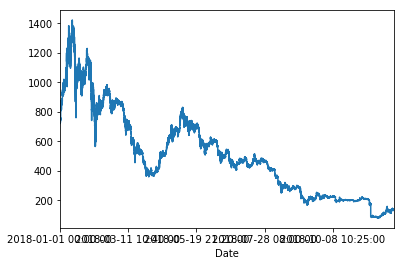

In [9]:
#################################################
# Data Visualization - See Ethereum price in 2018
#################################################
import matplotlib.pyplot as plt

df_ETH_close_price
df_ETH_close_price.plot()
plt.show()

<p>As you can see the Ethereum price in 2018 is on bear trend.<p>

In [10]:
################################################
# load Dataset from the two csv files
# gemini_BTCUSD_2018_1min.csv
# gemini_ETHUSD_2018_1min.csv
################################################

# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as time
from datetime import datetime
import warnings
import os
from tqdm import tnrange, tqdm_notebook
import time

data_folder = './data/minute/'
data_files = ['gemini_BTCUSD_2018_1min.csv', 'gemini_ETHUSD_2018_1min.csv']

def date_format(date_str):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(date_str))
    
def build_dataset():
    
    df_main = pd.DataFrame() 
    
    for file in tqdm_notebook(data_files):
        if file.endswith('.csv'):
            
            # get info from filename
            exchange, pair, year, _ = file.replace('.csv', '').split('_')
        
            # load data .csv file
            file_path = os.path.join(data_folder, file)
            df = pd.read_csv(file_path, parse_dates=True, skiprows=2, names=['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'])
            
            # date already in correct format yyyy-mm-dd hh:mm:ss
            # no need to reformat
            # df['Date'] = df['Date'].apply(lambda x: date_format(x))
            
            # set Date as index column
            df.set_index('Date', inplace=True)

            # rename columns
            rename_cols_from = ['Close', 'Volume']
            rename_cols_to = ['{}_{}_Close'.format(exchange, pair), '{}_{}_Volume'.format(exchange, pair)]
            df.rename(columns={rename_cols_from[0]: rename_cols_to[0], rename_cols_from[1]: rename_cols_to[1]}, inplace=True)

            # reduce to only columns you want to keep
            df = df[[rename_cols_to[0], rename_cols_to[1]]]
                        
            # join all csv data into one dataframe
            if len(df_main) == 0:  
                df_main = df
            else:
                df_main = df_main.join(df)
        
            
    # fill any missing data
    df_main.fillna(method="ffill", inplace=True)

    # delete any na
    df_main.dropna(inplace=True)
    
    return df_main
            
df_main = build_dataset()          
        
# order time sequence ASC
# 2018-01-01 to 2018-12-31
df_main.sort_index(inplace=True)

# remove any bad data
# the following index is isolated and not useful to predict sequence future data
# index=0, index value=2017-09-22 19:00:00
df_main.drop(df_main.index[0], inplace=True)


In [11]:
# Data Exploration - preview first 5 records
df_main.head()

,gemini_BTCUSD_Close,gemini_BTCUSD_Volume,gemini_ETHUSD_Close,gemini_ETHUSD_Volume
Date,,,,
2018-01-01 00:01:00,13800.00,0.933856,737.98,2.410785
2018-01-01 00:02:00,13775.00,1.747634,736.03,1.613000
2018-01-01 00:03:00,13772.85,1.040767,738.29,1.135121
2018-01-01 00:04:00,13750.00,6.171053,738.29,0.000000
2018-01-01 00:05:00,13700.00,2.305962,735.00,66.676885


In [12]:
# Data Exploration - preview last 5 records
df_main.tail()

,gemini_BTCUSD_Close,gemini_BTCUSD_Volume,gemini_ETHUSD_Close,gemini_ETHUSD_Volume
Date,,,,
2018-12-31 23:55:00,3685.70,3.279082,130.8,0.000000
2018-12-31 23:56:00,3686.38,8.244595,130.0,79.267075
2018-12-31 23:57:00,3686.38,0.089801,130.0,44.386537
2018-12-31 23:58:00,3686.38,0.117334,130.0,7.966173
2018-12-31 23:59:00,3692.35,4.107691,130.8,8.688215


In [13]:
print(df_main.columns)

Index(['gemini_BTCUSD_Close', 'gemini_BTCUSD_Volume', 'gemini_ETHUSD_Close',
       'gemini_ETHUSD_Volume'],
      dtype='object')


### Correlation between bitcoin and ethereum


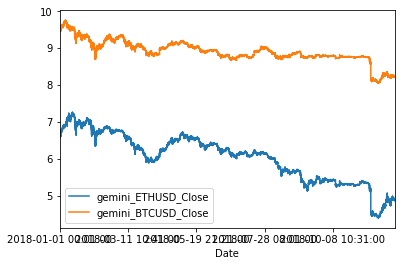

In [14]:

plot_cols = ['gemini_ETHUSD_Close', 'gemini_BTCUSD_Close']
df_main_logged = df_main[plot_cols]
df_main_logged = np.log(df_main_logged)
df_main_logged[plot_cols].plot()

### Mean Reversion in bitcoin and ethereum

/home/fi/anaconda3/envs/capstone/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


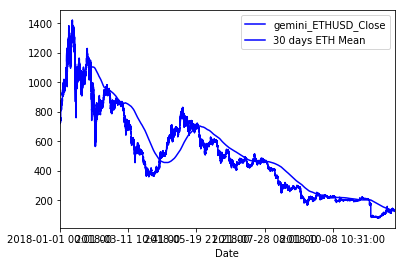

In [15]:
minutes_in_30days = 60*24*30

df_rm = df_main[plot_cols]

df_rm['30 days ETH Mean'] = df_rm['gemini_ETHUSD_Close'].rolling(window=minutes_in_30days).mean()
df_rm[['gemini_ETHUSD_Close', '30 days ETH Mean']].plot(color='blue')
plt.show()

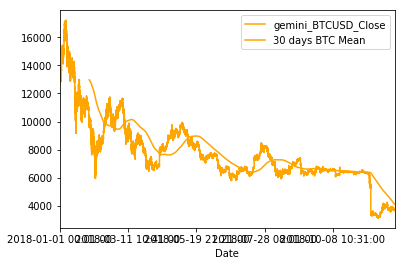

In [16]:
df_rm['30 days BTC Mean'] = df_rm['gemini_BTCUSD_Close'].rolling(window=minutes_in_30days).mean()
df_rm[['gemini_BTCUSD_Close', '30 days BTC Mean']].plot(color='orange')
plt.show()

In [17]:
################################################
# Define Lookback sequence and Target column     
################################################

In [18]:
# RNN model learn by lookback history
# the longer the lookback period the better, but more data will take longer to train
LOOKBACK_HISTORY_SEQ_LEN = 100 # look back last 100 minutes 

# How far we wish to predict the future?
PREDICT_FUTURE_SEQ_LEN = 5 # predict 5 minute in the future

# We are predicting the future price of Ethereum in exchange Gemini
PREDICT_COLUMN = 'gemini_ETHUSD_Close'

# Could switch to bitcoin, or any other altcoin for future development
# PREDICT_COLUMN = 'gemini_BTCUSD_Close' 

# Create a new column to hold the future price of Ethereum
# this allow the calculation of price raised or falled.
PREDICT_COLUMN_FUTUTE = '{}_Future'.format(PREDICT_COLUMN)

# The target label column 
# holding binary values indicate the future price is either: 
# If future price Raised, Action=Buy, Stored Value=1
# If future price Falled, Action=Sell, Stored Value=0
TARGET_LABEL = 'Target_Action'

In [19]:
# Data Exploration - preview column data, and check no NaN
df_main[PREDICT_COLUMN]

Date
2018-01-01 00:01:00    737.98
2018-01-01 00:02:00    736.03
2018-01-01 00:03:00    738.29
2018-01-01 00:04:00    738.29
2018-01-01 00:05:00    735.00
2018-01-01 00:06:00    736.00
2018-01-01 00:07:00    736.20
2018-01-01 00:08:00    736.20
2018-01-01 00:09:00    736.20
2018-01-01 00:10:00    736.31
2018-01-01 00:11:00    736.21
2018-01-01 00:12:00    736.21
2018-01-01 00:13:00    736.20
2018-01-01 00:14:00    736.20
2018-01-01 00:15:00    735.00
2018-01-01 00:16:00    733.01
2018-01-01 00:17:00    733.01
2018-01-01 00:18:00    733.01
2018-01-01 00:19:00    732.99
2018-01-01 00:20:00    732.99
2018-01-01 00:21:00    732.99
2018-01-01 00:22:00    732.99
2018-01-01 00:23:00    732.99
2018-01-01 00:24:00    732.99
2018-01-01 00:25:00    732.99
2018-01-01 00:26:00    731.54
2018-01-01 00:27:00    730.61
2018-01-01 00:28:00    731.01
2018-01-01 00:29:00    733.00
2018-01-01 00:30:00    733.00
                        ...  
2018-12-31 23:30:00    130.91
2018-12-31 23:31:00    130.91
2018-

In [20]:
#############################################################################
# Binary Classification
#   the binary values are Buy=1 or Sell=0
# The function binary_classify is map to the dataset 
#   to generate values in target column
#   if future price raised, then buy representation value 1 is assigned
#   if future price falled, then sell representation value value is assigned
#############################################################################

# Numeric Representation of Buy and Sell
SELL = 0
BUY = 1

# function to calculate values to assign target value in each data point.
def binary_classify(current_price, future_price):
    if(float(future_price) < float(current_price)):
        return SELL
    else:
        return BUY

In [21]:
# create a new column for future price (the future price is already in dataset) 
# shift target column data upwards to create the future data
# for each data rows, this results a current price and a future price
# the current price and future price is then pass to classify() to predict action buy/sell
df_main[PREDICT_COLUMN_FUTUTE] = df_main[PREDICT_COLUMN].shift(-PREDICT_FUTURE_SEQ_LEN)


In [22]:
# create a new column for target action buy or sell
df_main[TARGET_LABEL] = list(map(binary_classify, df_main[PREDICT_COLUMN], df_main[PREDICT_COLUMN_FUTUTE])) 


In [23]:
# check data column values shifted by -5, and target label is correctly classified
df_main[[PREDICT_COLUMN, PREDICT_COLUMN_FUTUTE, TARGET_LABEL]].head(100)

,gemini_ETHUSD_Close,gemini_ETHUSD_Close_Future,Target_Action
Date,,,
2018-01-01 00:01:00,737.98,736.00,0
2018-01-01 00:02:00,736.03,736.20,1
2018-01-01 00:03:00,738.29,736.20,0
2018-01-01 00:04:00,738.29,736.20,0
2018-01-01 00:05:00,735.00,736.31,1
2018-01-01 00:06:00,736.00,736.21,1
2018-01-01 00:07:00,736.20,736.21,1
2018-01-01 00:08:00,736.20,736.20,1
2018-01-01 00:09:00,736.20,736.20,1


In [24]:
number_of_buys = len(df_main[df_main[TARGET_LABEL] == BUY])
number_of_sells = len(df_main[df_main[TARGET_LABEL] == SELL])

print ('Number of Buys:', number_of_buys)
print ('Number of Sells:', number_of_sells)

if (number_of_buys > number_of_sells):
    print ('There are more Buys than Sells.')
elif (number_of_buys < number_of_sells):
    print ('There are more Sells than Buys.')
else:
    print ('There are equal number of Buys and Sells.')

Number of Buys: 276145
Number of Sells: 213961
There are more Buys than Sells.


In [25]:
####################################################################
# Data split into 
#   training   set 95% 
#   validation set 05% 
#     slice our validation while data still in correctly ordered
####################################################################

def data_split(df):
    time_list = sorted(df.index.values)

    val_set_percentage = 0.05
    chop_at_time_index = -int(val_set_percentage * len(time_list))
    chop_at_time = sorted(df_main.index.values)[chop_at_time_index]

    df_train = df_main[(df_main.index < chop_at_time)]
    df_validation = df_main[(df_main.index >= chop_at_time)]

    return df_train, df_validation, chop_at_time
    
df_train, df_validation, chop_at_time = data_split(df_main)

print ('The dataset split at index time:', chop_at_time)
print ('The number of data points in training set:', len(df_train))
print ('The number of data points in validation set:', len(df_validation))


The dataset split at index time: 2018-12-14 23:35:00
The number of data points in training set: 465601
The number of data points in validation set: 24505


In [26]:
######################################################################
# Pre-processing data
# 1. drop future column - PREDICT_COLUMN_FUTUTE
# 2. normalize data by 
#   2.1 change values to pct change
#   2.2 scale values to 0 -> 1.0
# 3. build sequences, each data point get 100 minutes lookback history 
# 4. balance data to 50% buys 50% sells
# 5. return features as X, target as y
######################################################################

from sklearn import preprocessing
from collections import deque
import random

def data_preprocessing(df):
    
    # 1. drop future column
    df = df.drop(PREDICT_COLUMN_FUTUTE, 1)
    
    # handle any nan values, by fill forward
    df.fillna(method='ffill')
        
    for col in df.columns:
        if col != TARGET_LABEL:
            
            # handling volume values 0.0, 
            # these 0.0 value will cause pct_change to error by divide by 0
            # replace 0.0 with NAN
            df[col].replace([0.0], [float('nan')], inplace=True) 

            # drop any data points have volume value 0.0, as it might be misleading
            df.dropna(inplace=True) 
            
            # 2.1 normalize data - change values to pct change
            df[col] = df[col].pct_change()
                        
            # 2.2 scale data - change values to 0 -> 1.0
            df[col] = preprocessing.scale(df[col].values)

    df.dropna(inplace=True)
    
    # 3. build sequences of history rows, last 100 minutes
    all_sequences = []
    next_sequence = deque(maxlen=LOOKBACK_HISTORY_SEQ_LEN)
    
    for data_row in df.values:
        # extract feature columns, ignore target column
        features_only_no_target = [n for n in data_row[:-1]]
        next_sequence.append(features_only_no_target)
    
        # once the sequence have enough length, 24 hours, then append ot main list
        if len(next_sequence) == LOOKBACK_HISTORY_SEQ_LEN:
            all_sequences.append([np.array(next_sequence), data_row[-1]])
            
    # shuffle to random spread data
    random.shuffle(all_sequences)

    # 4. balance data to 50% buys 50% sells
    buy_list = []
    sell_list = []
    
    # first seperate out the buys and sells 
    for seq, target in all_sequences:
        if target == SELL:
            sell_list.append([seq, target])
        elif target == BUY:
            buy_list.append([seq, target])

    random.shuffle(buy_list)
    random.shuffle(sell_list)
    
    # work out which havethe smaller len, the crop on that len
    lower_len = min(len(buy_list), len(sell_list))

    buy_list = buy_list[:lower_len]
    sell_list = sell_list[:lower_len]
    
    # join the list back together and shuffle to spread the buys and sells evenly
    all_sequences = buy_list + sell_list
    random.shuffle(all_sequences)
    
    # 5. return features as X, target as y
    X = []
    y = []
    
    for seq, target in all_sequences:
        X.append(seq)
        y.append(target)
    
    return np.array(X), y
    

In [27]:
X_train, y_train = data_preprocessing(df_train)
X_val, y_val = data_preprocessing(df_validation)

In [28]:
# check data len
print ('Size of X train data:', len(X_train))
print ('Size of y train data:', len(y_train))
print ('Size of X validation data:', len(X_val))
print ('Size of y validation data:', len(y_val))

Size of X train data: 240416
Size of y train data: 240416
Size of X validation data: 11442
Size of y validation data: 11442


In [29]:
# check target buy=1, sell=0
print ('y train buys:', y_train.count(1))
print ('y train sells:', y_train.count(0))

print ('y validation buys:', y_val.count(1))
print ('y validation sells:', y_val.count(0))

# y train buys: 102112
# y train sells: 102112
# y validation buys: 5142
# y validation sells: 5142


y train buys: 120208
y train sells: 120208
y validation buys: 5721
y validation sells: 5721


In [30]:
##################################################
# RNN Model for Time Sequence 
##################################################

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time
import os
from glob import glob


In [32]:
######################################################
# Tuning Hyper Parameters
#   fine tune model by 
#   executing combination of multiple hyper parameters
######################################################

###
# lstm_layers = [1, 2, 3, 4]
# layer_sizes = [32, 64, 128] # my machine crashed at 256
# dense_layers = [1, 2, 3]
# batch_sizes = [32, 64, 128]
# dropouts = [0.2, 0.3, 0.4]

# commented out as too many models, takes too long
###

# use best model hyper parameters, to speed up reviewer time 
# lstm-2-nodes-128-dense-1-batch-64-dropout-0.2

EPOCHS = 10

lstm_layers = [2]
layer_sizes = [128] 
dense_layers = [1]
batch_sizes = [64]
dropouts = [0.2]

number_of_models = len(dense_layers)*len(layer_sizes)*len(lstm_layers)*len(batch_sizes)*len(dropouts)
print ('Number of models:', number_of_models)


Number of models: 1


In [33]:

model_count = 0

for lstm_layer in lstm_layers:
    for layer_size in layer_sizes:
        for dense_layer in dense_layers:
            for batch_size in batch_sizes:
                for dropout in dropouts:
                    model_name = 'exch-gemini'
                    model_name += '-predict-'+PREDICT_COLUMN+'-lookback-'+str(LOOKBACK_HISTORY_SEQ_LEN)+'-future-'+str(PREDICT_FUTURE_SEQ_LEN)
                    model_name += "-lstm-{}-nodes-{}-dense-{}-batch-{}-dropout-{}".format(lstm_layer, layer_size, dense_layer, batch_size, dropout)

                    model_count += 1

                    print ('*Model {}/{}*'.format(model_count, number_of_models))
                    print (model_name)

                    # let user know if hyper parameters already trained
                    # this could happen if kernal crash and restarted training
                    check_logs_file = 'logs/{}'.format(model_name)
                    if glob(check_logs_file+'*'):
                        print ('%s already exist.' % (check_logs_file))
                        # continue

                    # name of model by hyper-parameter values
                    # to compare them all in tensorboard
                    model_name += '-time-{}'.format(int(time.time()))

                    # LSTM layers - minimum of 1
                    model = Sequential()
                    model.add(CuDNNLSTM(layer_size, input_shape=(X_train.shape[1:]), return_sequences=True))

                    # how much to forget
                    model.add(Dropout(dropout))
                    
                    # normalize output, the output is the input for the next LSTM layer
                    model.add(BatchNormalization())

                    # LSTM layers - add more
                    for l in range(lstm_layer-1):
                        model.add(CuDNNLSTM(layer_size, return_sequences=True))
                        model.add(Dropout(dropout))
                        model.add(BatchNormalization())

                    model.add(CuDNNLSTM(layer_size))
                    model.add(Dropout(dropout))
                    
                    # this LSTM layer do not need to return sequence, as the next layer is dense layer
                    model.add(BatchNormalization())

                    # Dense layers
                    for _ in range(dense_layer):
                        model.add(Dense(32, activation='relu'))
                        model.add(Dropout(dropout))

                    # the final layer only have 2 nodes for binary classification: Buy=1, Sell=0
                    model.add(Dense(2, activation='softmax'))

                    # optimizer
                    #   learning rate
                    #   learning decay
                    opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)

                    # compile 
                    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # save logs for tensorboard graphs
                    tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))

                    # saves only the best ones
                    filepath = "RNN_-{epoch:02d}-{val_acc:.3f}"
                    checkpoint = ModelCheckpoint('models/{}.model'.format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')) 

                    # training
                    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint],)
                    
                    # score
                    score = model.evaluate(X_val, y_val, verbose=0)
                    
                    # loss and accuracy
                    loss = score[0]
                    accuracy = score[1]
                    print('Test Loss:{}'.format(loss))
                    print('Test Accuracy:{}'.format(accuracy))
                    
                    # save model
                    model.save('models/{}'.format(model_name))


*Model 1/1*
exch-gemini-predict-gemini_ETHUSD_Close-lookback-100-future-5-lstm-2-nodes-128-dense-1-batch-64-dropout-0.2
logs/exch-gemini-predict-gemini_ETHUSD_Close-lookback-100-future-5-lstm-2-nodes-128-dense-1-batch-64-dropout-0.2 already exist.
Train on 240416 samples, validate on 11442 samples
Epoch 1/10
240416/240416 [==============================] - 171s 711us/step - loss: 0.6937 - acc: 0.5362 - val_loss: 0.6844 - val_acc: 0.5521
Epoch 2/10
240416/240416 [==============================] - 172s 715us/step - loss: 0.6846 - acc: 0.5528 - val_loss: 0.6800 - val_acc: 0.5630
Epoch 3/10
240416/240416 [==============================] - 172s 715us/step - loss: 0.6834 - acc: 0.5571 - val_loss: 0.6826 - val_acc: 0.5580
Epoch 4/10
240416/240416 [==============================] - 170s 709us/step - loss: 0.6818 - acc: 0.5614 - val_loss: 0.6817 - val_acc: 0.5628
Epoch 5/10
240416/240416 [==============================] - 170s 709us/step - loss: 0.6805 - acc: 0.5674 - val_loss: 0.6825 - val_acc